## Import Packages

In [61]:
# import ROOT 
import pylhe
import math
import matplotlib.pyplot as plt
import numpy as np
import ROOT
# %jsroot on

## Define Function

In [48]:
def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))

def invariant_mass_one(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','px','py','pz']))

def transvers_mass(p1,p2):
#     return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','pz']))

def Momentum_Transfrom(particle):
    E, px ,py, pz = particle.e, particle.px, particle.py, particle.pz
    P = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    eta = 1./2.*np.log((P + pz)/(P - pz))
    phi = np.arctan(py/px)
    m = np.sqrt(np.sqrt((E**2 - px**2 - py**2 - pz**2)**2))

    return pt, eta, phi, m

def find_fianl_quarks(find_particle):
    jet = [1,2,3,4,5,6,7,21]
#     for i in range(1,7):
    for i, element in enumerate(jet):    
        tmp = find_particle[(find_particle[:,2]==1)]
        tmp = tmp[(np.abs(tmp[:,0])==element)]
        if len(tmp) == 2:
            p1 = int(tmp[0][1])
            p2 = int(tmp[1][1])
            break
        
#     for i in range(1,7):
    for i, element in enumerate(jet):    
        tmp = find_particle[(find_particle[:,2]==1)]
        tmp = tmp[(np.abs(tmp[:,0])==element)]
        if len(tmp) == 1:
            p1 = int(tmp[0][1])  
#             for j in range(i+1,7):
            for j, element in enumerate(jet[i+1:]):    
                tmp = find_particle[(find_particle[:,2]==1)]
                tmp = tmp[(np.abs(tmp[:,0])==element)]
                if len(tmp) == 1:
                    p2 = int(tmp[0][1])
                    break

            break
    return(p1, p2)

def Event_List(LHE_file, index=0):
    event_list = []
#     delta_eta_ww, delta_eta_ll, delta_eta_jj = [], [], []
    MWW, Mll, Mjj = [], [], []
    PT_W = []
    for i, event in enumerate (LHE_file):
        find_particle = []
        for j, element in enumerate(event.particles):
            find_particle.append([element.id,j,element.status]) #id, index, status

        find_particle = np.array(find_particle)

        if index == 0:
            tmp_wp1 = int(find_particle[np.abs(find_particle[:,0])==24][0][1])
            WP1 = Momentum_Transfrom(event.particles[tmp_wp1])
            tmp_jp1, tmp_jp2 = find_fianl_quarks(find_particle)
            JP1 = Momentum_Transfrom(event.particles[tmp_jp1])
            JP2 = Momentum_Transfrom(event.particles[tmp_jp2])
            Mjj.append(invariant_mass(event.particles[tmp_jp1],event.particles[tmp_jp2]))
            PT_W.append(WP1[0])
            event_list.append(event)
            
        elif index ==1:
#             tmp_wp1 = int(find_particle[np.abs(find_particle[:,0])==24][0][1])
#             WP1 = Momentum_Transfrom(event.particles[tmp_wp1])
            tmp_jp1, tmp_jp2 = find_fianl_quarks(find_particle)
            JP1 = Momentum_Transfrom(event.particles[tmp_jp1])
            JP2 = Momentum_Transfrom(event.particles[tmp_jp2])
            Mjj.append(invariant_mass(event.particles[tmp_jp1],event.particles[tmp_jp2]))
#             PT_W.append(WP1[0])
            event_list.append(event)
            
#         tmp_wp1 = int(find_particle[np.abs(find_particle[:,0])==24][0][1])
# #         tmp_wp2 = int(find_particle[np.abs(find_particle[:,0])==24][1][1])

#         WP1 = Momentum_Transfrom(event.particles[tmp_wp1])
# #         WP2 = Momentum_Transfrom(event.particles[tmp_wp2])
        
# #         if len(find_particle[(np.abs(find_particle[:,0])==13)]) == 2:
# #             tmp_p1 = int(find_particle[np.abs(find_particle[:,0])==13][0][1])
# #             tmp_p2 = int(find_particle[np.abs(find_particle[:,0])==13][1][1])
# #         elif len(find_particle[(np.abs(find_particle[:,0])==13)]) == 1 and len(find_particle[(np.abs(find_particle[:,0])==11)]) == 1:
# #             tmp_p1 = int(find_particle[np.abs(find_particle[:,0])==13][0][1])
# #             tmp_p2 = int(find_particle[np.abs(find_particle[:,0])==11][0][1])
# #         elif len(find_particle[(np.abs(find_particle[:,0])==11)]) == 2:
# #             tmp_p1 = int(find_particle[np.abs(find_particle[:,0])==11][0][1])
# #             tmp_p2 = int(find_particle[np.abs(find_particle[:,0])==11][1][1])
            
# #         LP1 = Momentum_Transfrom(event.particles[tmp_p1])
# #         LP2 = Momentum_Transfrom(event.particles[tmp_p2])
# # #         print(event.particles[tmp_p1].id,event.particles[tmp_p2].id)
# # #         print(LP1, "sss", LP2)
#         tmp_jp1, tmp_jp2 = find_fianl_quarks(find_particle)
#         JP1 = Momentum_Transfrom(event.particles[tmp_jp1])
#         JP2 = Momentum_Transfrom(event.particles[tmp_jp2])

# #         delta_eta_ww.append(np.abs(WP1[1] - WP2[1]))
# #         delta_eta_ll.append(np.abs(LP1[1] - LP2[1]))
# #         delta_eta_jj.append(np.abs(JP1[1] - JP2[1]))
# #         MWW.append(invariant_mass(event.particles[tmp_wp1],event.particles[tmp_wp2]))
# #         Mll.append(invariant_mass(event.particles[tmp_p1],event.particles[tmp_p2]))
#         Mjj.append(invariant_mass(event.particles[tmp_jp1],event.particles[tmp_jp2]))
#         PT_W.append(WP1[0])
#         event_list.append(event)

        
#         if i == 10:
#             break
        
    return event_list, PT_W, Mjj#, delta_eta_ww, delta_eta_ll, delta_eta_jj, MWW, Mll, 

# Create a Event List and Mass List

In [49]:
# process_path_HVT = '/home/MC_Samples/Universality_DNN/HVT/Events/run_01/unweighted_events.lhe' 
# process_path_ppwz = '/home/u5/ppwz/Events/run_01/unweighted_events.lhe' 
process_path_ppwz = '/root/MG5_aMC_v2_7_3/ppwz/Events/run_01/unweighted_events.lhe' 
process_path_ppjj = '/root/MG5_aMC_v2_7_3/ppjj/Events/run_01/unweighted_events.lhe' 

# HVT = pylhe.readLHE(process_path_HVT)
ppwz = pylhe.readLHE(process_path_ppwz)
ppjj = pylhe.readLHE(process_path_ppjj)

# HVT_eventlist = Event_List(HVT)
ppwz_eventlist = Event_List(ppwz)
ppjj_eventlist = Event_List(ppjj,index=1)

In [ ]:
ppjj_eventlist[2]

In [42]:
len(ppwz_eventlist[1])

10000

## Print Information for First Event

In [50]:
index = 0
print("{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}".format("#","id","mother1","mother2","e","px","py","pz","status"))

for i, element in  enumerate(ppjj_eventlist[0][index].particles):
    print("{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}".format(i+1, element.id,element.mother1,element.mother2,element.e,element.px,element.py,element.pz,element.status))


# dir(GM_eventlist[0][0].particles[0]) #Check variables stored in particle
# [i.event for i in GM_eventlist[0].particles]
# [i.status for i in GM_eventlist[0].particles] #particle status for first event (Parton level)
# [i.mothers for i in GM_eventlist[0].particles] #particle id for first event (Parton level)


     #         id      mother1     mother2        e           px          py          pz        status   
     1         -2         0           0        212.990      -0.000      0.000      212.990        -1     
     2         21         0           0        299.257      0.000       -0.000     -299.257       -1     
     3         21         1           2        280.886     -37.900     203.212     -190.171       1      
     4         -2         1           2        231.361      37.900     -203.212    103.904        1      


## Plot for $PT_{W^\pm}$

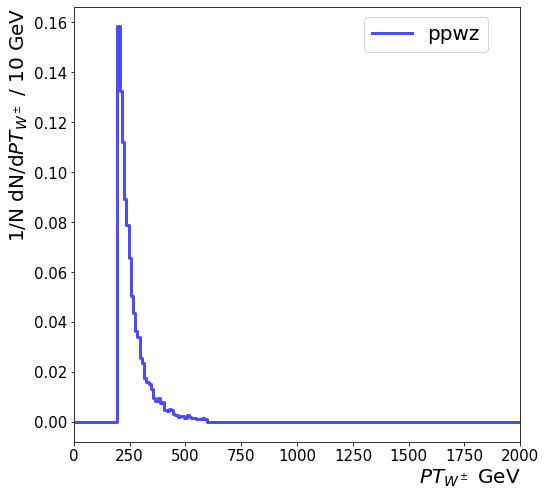

In [16]:
plt.figure(figsize=(8,8)) # plotsize

index = 1 #PTW

bin_size = np.linspace(0,2000,201)
# hist_HVT, bins_HVT = np.histogram(HVT_eventlist[index], bins=bin_size)
# plt.step(bins_HVT[:-1], hist_HVT.astype(np.float32)/np.sum(hist_HVT),color = "green", where='mid',linewidth=3, alpha=0.7,label="HVT") 

hist_ppwz, bins_ppwz = np.histogram(ppwz_eventlist[index], bins=bin_size)
plt.step(bins_ppwz[:-1], hist_ppwz.astype(np.float32)/np.sum(hist_ppwz),color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppwz") 


plt.legend(bbox_to_anchor=(0.95, 1),ncol=1,fontsize=20) # plot label tag
# plt.yscale('log') 
plt.xlabel("$PT_{W^\pm}$ GeV" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/N dN/d$PT_{W^\pm}$ / 10 GeV", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.ylim((0,0.13))
plt.xlim((0,2000))
# plt.ylim((0.5,1000))
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

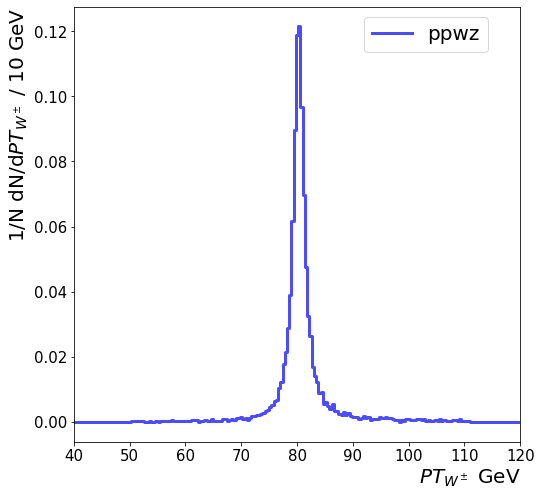

In [20]:
plt.figure(figsize=(8,8)) # plotsize

index = 2 #Mjj

bin_size = np.linspace(40,120,201)
# hist_HVT, bins_HVT = np.histogram(HVT_eventlist[index], bins=bin_size)
# plt.step(bins_HVT[:-1], hist_HVT.astype(np.float32)/np.sum(hist_HVT),color = "green", where='mid',linewidth=3, alpha=0.7,label="HVT") 

hist_ppwz, bins_ppwz = np.histogram(ppwz_eventlist[index], bins=bin_size)
plt.step(bins_ppwz[:-1], hist_ppwz.astype(np.float32)/np.sum(hist_ppwz),color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppwz") 


plt.legend(bbox_to_anchor=(0.95, 1),ncol=1,fontsize=20) # plot label tag
# plt.yscale('log') 
plt.xlabel("$PT_{W^\pm}$ GeV" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/N dN/d$PT_{W^\pm}$ / 10 GeV", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.ylim((0,0.13))
plt.xlim((40,120))
# plt.ylim((0.5,1000))
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

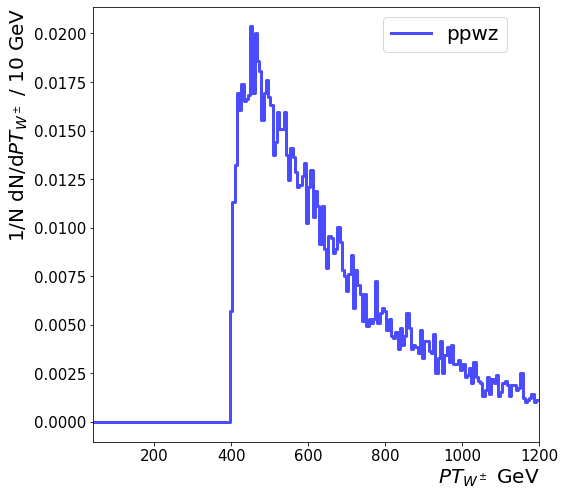

In [56]:
plt.figure(figsize=(8,8)) # plotsize

index = 2 #Mjj

bin_size = np.linspace(40,1200,201)
# hist_HVT, bins_HVT = np.histogram(HVT_eventlist[index], bins=bin_size)
# plt.step(bins_HVT[:-1], hist_HVT.astype(np.float32)/np.sum(hist_HVT),color = "green", where='mid',linewidth=3, alpha=0.7,label="HVT") 

hist_ppwz, bins_ppwz = np.histogram(ppjj_eventlist[index], bins=bin_size)
plt.step(bins_ppwz[:-1], hist_ppwz.astype(np.float32)/np.sum(hist_ppwz),color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppwz") 


plt.legend(bbox_to_anchor=(0.95, 1),ncol=1,fontsize=20) # plot label tag
# plt.yscale('log') 
plt.xlabel("$PT_{W^\pm}$ GeV" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/N dN/d$PT_{W^\pm}$ / 10 GeV", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.ylim((0,0.13))
plt.xlim((40,1200))
# plt.ylim((0.5,1000))
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()